# Practical work 3: 2D sampling and aliasing 

Properties studied in 1D apply in 2D. The following results can be admitted: 
 - given a regular grid, a sampling of a continuous 2D signal can be modelled as follow:
$$
x_s(t,u) = x(t,u)C(t,u)\quad \text{with}\quad C(t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} \delta(t-kT_s,u - lT_s)
$$ $C$ is the analog of Dirac comb (also called impulse train) in 2D
 - spectrum of $x_s$ writes:
$$
X_s(f,g) = \frac1{T_s^2}\sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} X(f-kf_s,g-lf_s)
$$
2D sampling then implies a periodisation of the spectrum for the two dimensions
 - it is possible to reconstruct the original signal from the sampled signal if 2D Shannon condition is verified (band limited signal) with:
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_s(kT_s,lT_s) \operatorname{sinc}(\pi f_s (t-kT_s)) \operatorname{sinc}(\pi f_s(u - lT_s))\qquad\qquad\qquad\text{(1)}
$$
so called Shannon interpolation.
 
## Exercice 1: aliasing and windowing of 2D signals
 
Given the following signal:
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta))
$$
Here an example with $\theta=\frac\pi4$:
<div>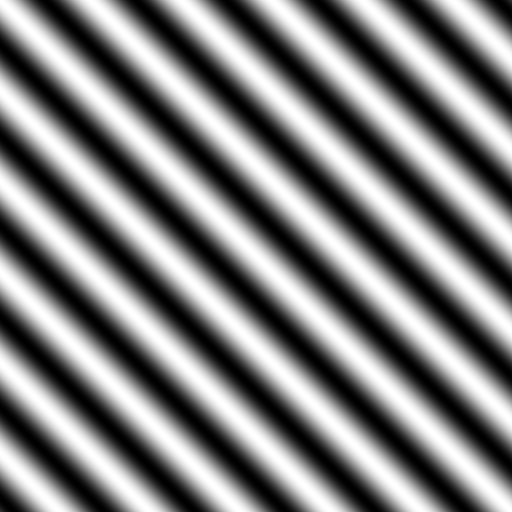</div>
The goal of this exercice is to study the limit conditions of sampling of this image in order to avoid aliasing.

In [1]:
import numpy as np
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt
# for interactive ploting, see surf() below
%matplotlib notebook 
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

def sinusoid2d(A, theta, size, T0, Te):
    """ double**2*int*double**2 -> Array[double] """
    ct = np.cos(theta/180*np.pi)
    st = np.sin(theta/180*np.pi)
    x, y = np.meshgrid(np.arange(0, size, Te), np.arange(0, size, Te))
    return A*np.cos(2*np.pi*(y*ct - x*st)/T0)

def shannonInterpolation(I, Ts, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Ts-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Ts-y)
    return np.matmul(X.T, np.matmul(I, Y))

def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(500//80,500//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

def surf(Z,title=None):
    """ 3D plot of an image """
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig = plt.figure(figsize=(600/80,600/80))
    if title: plt.title(title)
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()
    

    

1. We provide the function `sinusoid2d(A, theta, L, T0, Ts)` that allows to sample signal $s_\theta$ with a sampling period of `Ts` (the grid is regular with the sample sampling value for directions $u$ and $t$). Paremeters `A`, `theta`, `L` and `T0` respectively control the amplitude, orientation and period ($T_0=\frac1{f_0}$) of signal $s_\theta$. Generate a pseudo continuous signal $s_{45}$ with `A=1`, `theta = 45`, `L = 512`, `T0 = 64` and `Ts=1`.


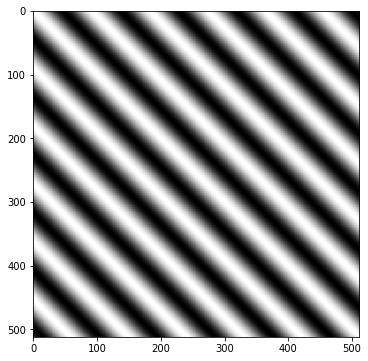

In [2]:
sig = sinusoid2d(1,45,512,64,1)
imshow(sig)

2. (a) What is the maximal frequency of previous signal $s_{45}$ in direction $t$ (denoted $f_t^{\text{max}}$) and direction $u$ (denoted $f_u^{\text{max}}$)? Let $f_m = \max(f_t^{\text{max}},f_u^{\text{max}})$. Explain why $f_m$ can be used to derive the limit frequency (in sens of Shannon) for the sampling of $s_{45}$.

$f_t^{\text{max}}$ = $(1/T0)cos(theta) = \frac{cos(45)}{64} $

$f_u^{\text{max}}$ = $(1/T0)sin(theta) = \frac{sin(45)}{64} $

Therefore, $f_m$ = $f_t^{\text{max}}$ = $f_u^{\text{max}} = 0.011$

According to the Shannon cryteria, $f_s$ > 2 * $f_m$


2. (b)  Sample $s_{45}$ with $f_s = 16 f_m$ and display the sampled signal.

Sampled signal with fs = 16fm
5.65685424949238


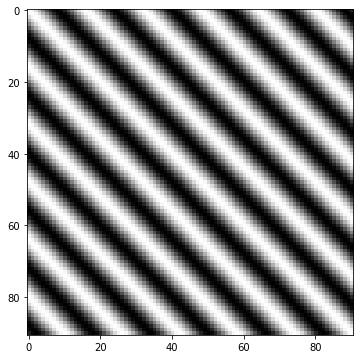

In [3]:
print("Sampled signal with fs = 16fm")
fm=2**(1/2)/2/64
fs1=16*fm
Ts1=1/fs1
print(Ts1)
samp_sig1 = sinusoid2d(1,45,512,64,Ts1)
imshow(samp_sig1)

We notice that the sampled signal has the same overall appearance as the original "continuous" one, but it has less points so it looks more pixelised (less precise)

2. (c) Compute the Fourier transform of the sampled signal and display frequencies. One can use `surf()` function for an interactive 3D plot.

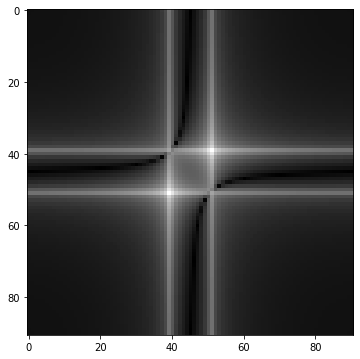

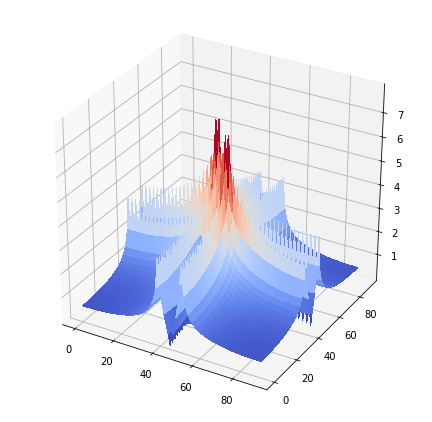

In [4]:
FTss = np.fft.fft2(samp_sig1)
FTss = np.fft.fftshift(np.log(1 + np.abs(FTss)))
imshow(FTss)
surf(FTss)

2. (d) Comment the spectrum:
    - verify the presence of the two Dirac peaks
    - for various values of $T_s$, observe changes in the spectrum. Compare with the spectrum of the continuous signal ($s_{45}$). What is the origin of theses differences?
    - (Bonus question):
        - Why, aside the two Dirac peaks, there are somes structures? Explain the origin of these lobes.
        - Increase $T_0$ in order to obtain a unique peak. Explain the origin of this fusion. Verify the limit value of $T_0$ for which the two peaks interfer.

- We do notice the 2 dirac peaks

- As expected, considering we are working with a sampled signal, the dirac peaks aren't infinitly thin, they still have some structure.

SPECTRUM OF THE CONTINUOUS SIGNAL S45


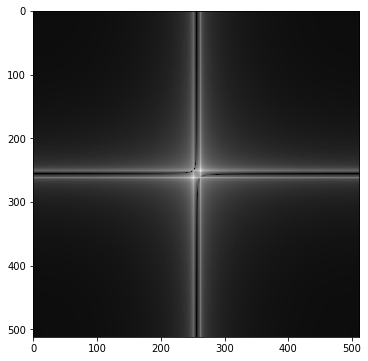

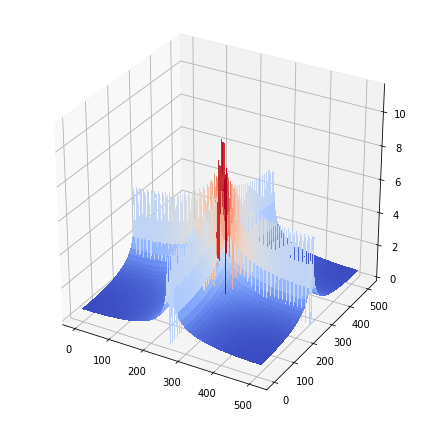

In [5]:
#SPECTRUM OF THE CONTINUOUS SIGNAL S45
print("SPECTRUM OF THE CONTINUOUS SIGNAL S45")
FTss = np.fft.fft2(sig)
FTss = np.fft.fftshift(np.log(1 + np.abs(FTss)))
imshow(FTss)
surf(FTss)

TS = 10


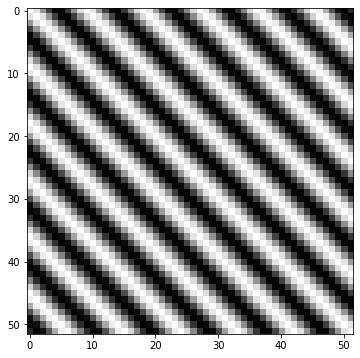

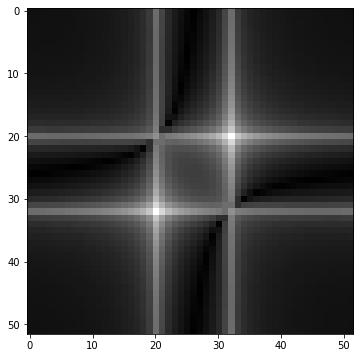

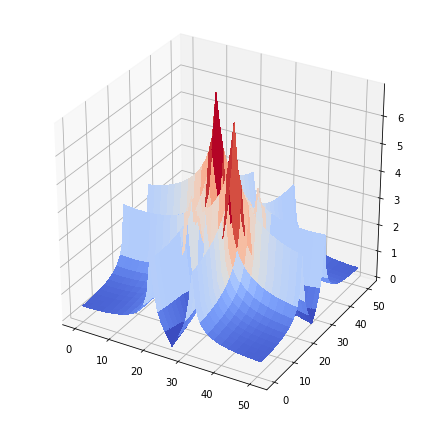

In [6]:
#Ts = 10
print("TS = 10")
samp_sig1 = sinusoid2d(1,45,512,64,10)
imshow(samp_sig1)
FTss = np.fft.fft2(samp_sig1)
FTss = np.fft.fftshift(np.log(1 + np.abs(FTss)))
imshow(FTss)
surf(FTss)

TS = 20


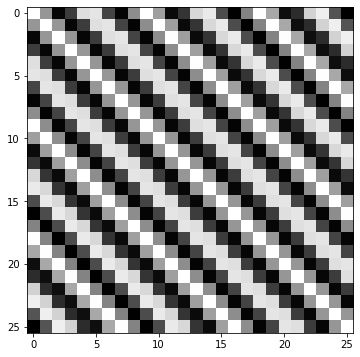

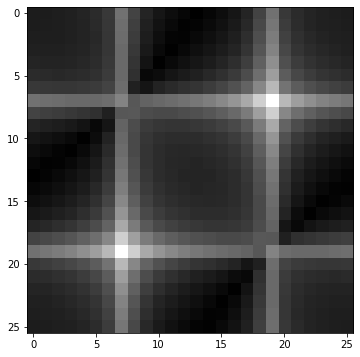

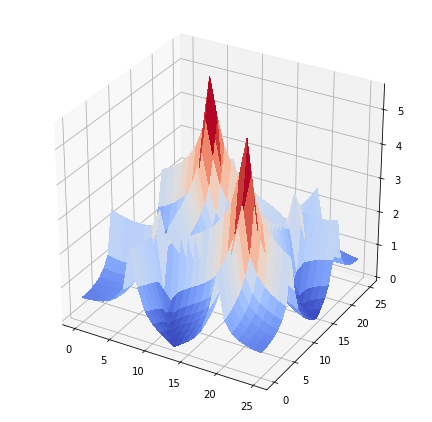

In [7]:
#Ts1 = 20
print("TS = 20")
samp_sig1 = sinusoid2d(1,45,512,64,20)
imshow(samp_sig1)
FTss = np.fft.fft2(samp_sig1)
FTss = np.fft.fftshift(np.log(1 + np.abs(FTss)))
imshow(FTss)
surf(FTss)

We can observe that as Ts gets bigger, the peaks of the Fourier Transform gets less defined.

This can be explained by
# Explain here 

3. (a) Sample $s_{45}$ with $f_s=4 f_m$ and display the sampled signal.

22.62741699796952


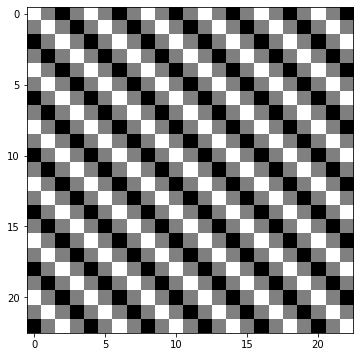

In [8]:
fs2=4*fm
Ts2=1/fs2
print(Ts2)
samp_sig2 = sinusoid2d(1,45,512,64,Ts2)
imshow(samp_sig2)

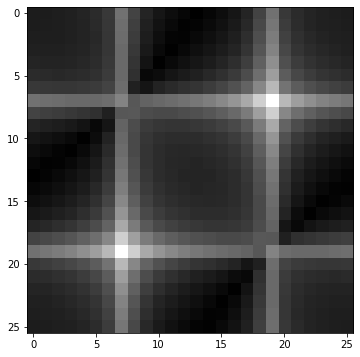

In [9]:
FTss = np.fft.fft2(samp_sig1)
FTss = np.fft.fftshift(np.log(1 + np.abs(FTss)))
imshow(FTss)

3. (b) Write a function `error()` implementing the relative average error $\displaystyle\epsilon_r = \frac 1{2AL^2}\sum_{k=0}^L\sum_{l=0}^L |x_r(k,l)-x_d(k,l)|$.

In [10]:
def error(xd, xr):
    L = 512
    A = 1
    err= 0
    for k in range(L):
        for l in range(L):
            err += np.absolute(xr[k][l] - xd[k][l])
    return (1/(2*A*L**2)) * err

3. (c) Reconstruct the sampled signal. Display original and reconstructed signal.
   Print the relative average error between the original and reconstructed images. What is the origin of this error?

original signal:


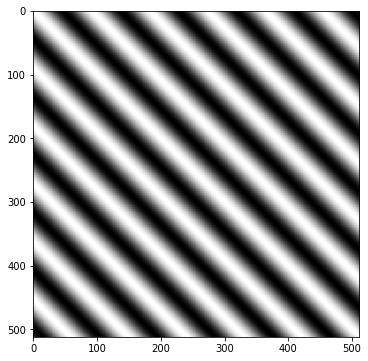

In [11]:
print("original signal:")
imshow(sig)

reconstructed signal with fs = 16fm:


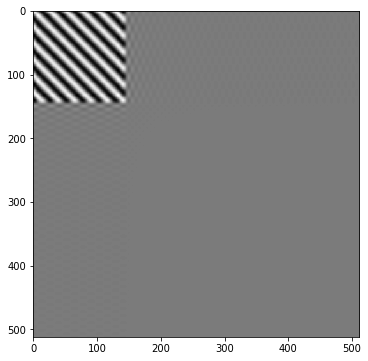

relative average error: 0.325413390026171


In [12]:
#reconstruction with 1st sampling, fs = 16fm

sig_r1 = shannonInterpolation(samp_sig1,Ts1, 512)

print("reconstructed signal with fs = 16fm:")
imshow(sig_r1)

print("relative average error:", error(sig, sig_r1))

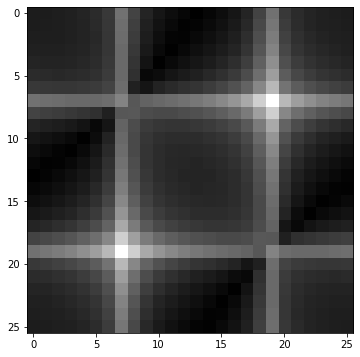

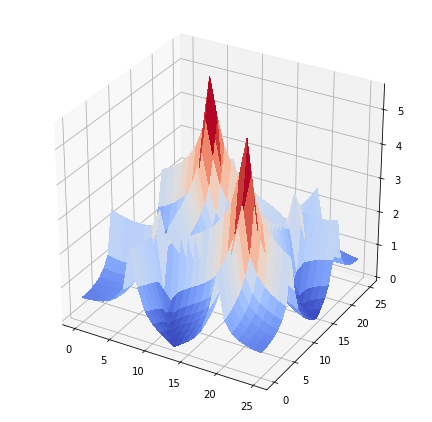

In [14]:
FTss4 = np.fft.fft2(samp_sig1)
FTss4 = np.fft.fftshift(np.log(1 + np.abs(FTss4)))
imshow(FTss4)
surf(FTss4)

reconstructed signal with fs = 4fm:


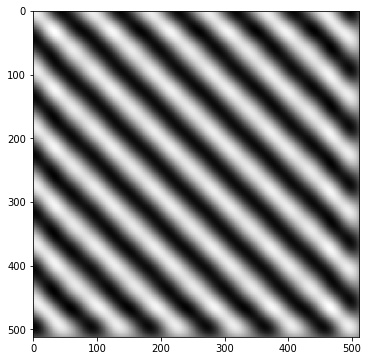

relative average error: 0.022936924363102643


In [15]:
#reconstruction with 2nd sampling, fs = 4fm

sig_r2 = shannonInterpolation(samp_sig2,Ts2, 512)

print("reconstructed signal with fs = 4fm:")
imshow(sig_r2)

print("relative average error:", error(sig, sig_r2))

Logicly, the error is bigger with the 2nd sampling (almost 4 times bigger). However, the 2nd reconstruction still looks like the original signal.

4. Same question than 3. with $f_s = \frac32f_m$. Comment the effects of aliasing.

60.33977866125205


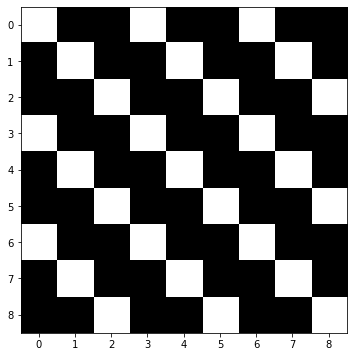

In [16]:
fs3=1.5*fm
Ts3=1/fs3
print(Ts3)
samp_sig3 = sinusoid2d(1,45,512,64,Ts3)
imshow(samp_sig3)


reconstructed signal with fs = (3/2)fm:


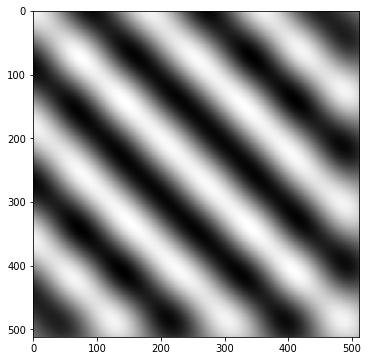

relative average error: 0.4068626475014679


In [17]:
#reconstruction with 3rd sampling, fs = (3/2)fm

sig_r3 = shannonInterpolation(samp_sig3,Ts3, 512)

print("reconstructed signal with fs = (3/2)fm:")
imshow(sig_r3)

print("relative average error:", error(sig, sig_r3))

The error is way bigger here, to the point where the reconstructed signal isn't recognisable anymore.
This was expected because of the Sharron criteria. The frequency chosen was too small (< 2fm)

5. Consider the continuous signal with an oriention of $\theta=10°$. What is the value of $f_m$? With a sampling of $\frac32 f_s$ what is the additional drawback appearing after the reconstruction? Explain.

$f_t^{\text{max}}$ = $(1/T0)cos(theta) = cos(10)/64 $

$f_u^{\text{max}}$ = $(1/T0)sin(theta) = sin(10)/64$

$f_t^{\text{max}}$ > $f_u^{\text{max}}$. Therefore, $f_m$ = $f_t^{\text{max}}$ = 0.0154


According to the Shannon cryteria, $f_s$ > 2 * $f_m$


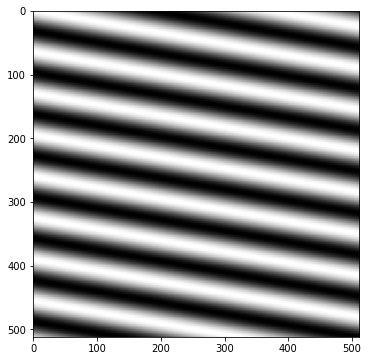

In [18]:
sig2 = sinusoid2d(1,10,512,64,1)
imshow(sig2)

3.8197186342054885


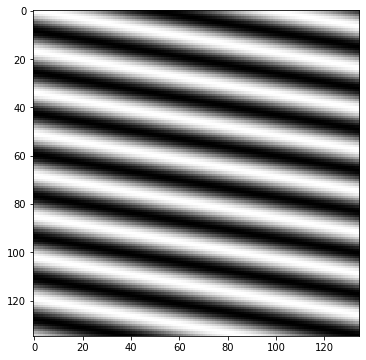

In [19]:
#Sampling

fm2 = 10 * (np.pi/180)
fs4=1.5*fm2
Ts4=1/fs4
print(Ts4)
samp_sig4 = sinusoid2d(1,10,512,64,Ts4)
imshow(samp_sig4)



reconstructed signal with fs = (3/2)fm:


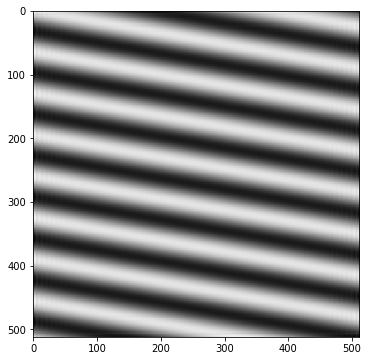

relative average error: 0.0037446084545638488


In [20]:
#reconstruction 
#reconstruction with 3rd sampling, fs = (3/2)fm

sig_r4 = shannonInterpolation(samp_sig4,Ts4, 512)

print("reconstructed signal with fs = (3/2)fm:")
imshow(sig_r4)

print("relative average error:", error(sig2, sig_r4))


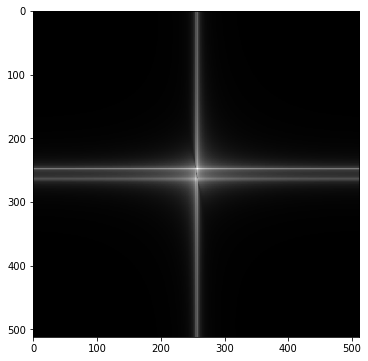

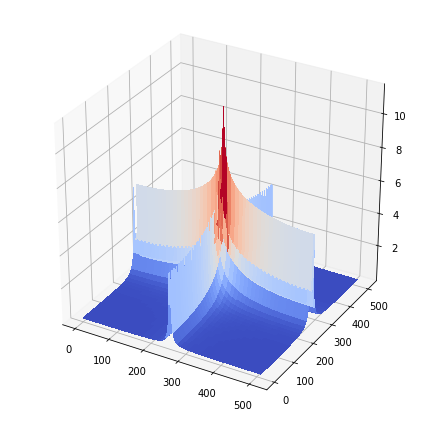

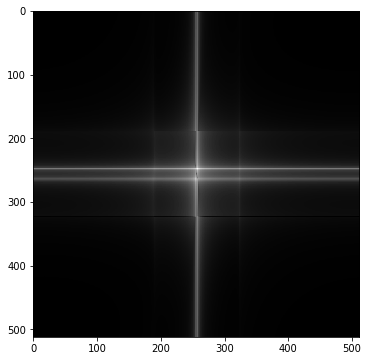

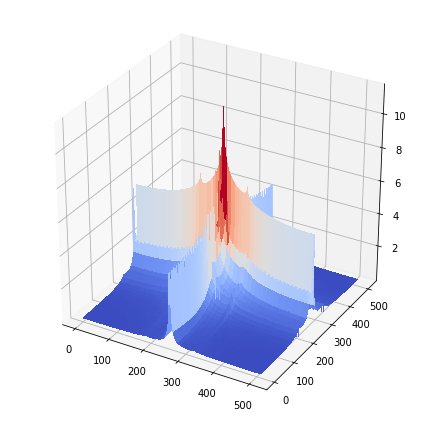

In [21]:

FTss2 = np.fft.fft2(sig2)
FTss2 = np.fft.fftshift(np.log(1 + np.abs(FTss2)))
imshow(FTss2)
surf(FTss2)


FTss3 = np.fft.fft2(sig_r4)
FTss3 = np.fft.fftshift(np.log(1 + np.abs(FTss3)))
imshow(FTss3)
surf(FTss3)

6. Bonus question: write a function `shannonInterpolationLoop()` implementing equation (1) using two loops, in a C way. Compare and discuss the run time of this function and  `shannonInterpolation()` on a small signal ($L=64$). Runtime can be measured using `tic()` and `tac()` functions.

In [22]:
from time import process_time
mytime = 0
def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
def tac():
    """ NoneType -> int """
    global mytime
    print (process_time()-mytime)
    mytime = process_time()


## Exercice 2: aliasing on natural images

In this exercice, we study aliasing on image `img/barbara.png`. Aliasing occurring with subsample of image, we propose to write a code that implements a subsample (using function `subSample2()` of factor 2 on the image.  

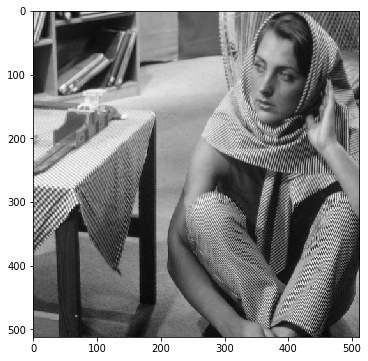

In [41]:
from PIL import Image

barbara = np.array(Image.open('img/barbara.png'))
imshow(barbara)
def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]

1. Explain what is a subsample of factor 2 and the impact when applied on an image. 

Subsampling an image reduces its number of pixels. Here, we're doing a subsample of factor 2 so we're dividing the picture size by 4. In doing so, we will make the picture blurrier (less precise). 

2. Write a code that
 - iterates the subsampling process
 - at each iteration, computes the Fourier transform of the subsampled image

   Display subsampled images and their spectrum. Describe and interpret the effects of aliasing. Why aliasing is a drawback ?

In [38]:
def subsample_loop(img, it_max = 10):
    I = img.copy()
    print("Original image:")
    imshow(img)
    imshow(np.fft.fftshift(np.log(1 + np.abs(np.fft.fft2(img)))))
    for i in range(it_max):
        print("ITÉRATION N°", i+1, ":")
        print("\tSubsampled image:")
        I = subSample2(I)
        imshow(I)
        print("\tSpectrum:")
        fourier = np.fft.fftshift(np.log(1 + np.abs(np.fft.fft2(I))))
        imshow(fourier)
    return 


Original image:


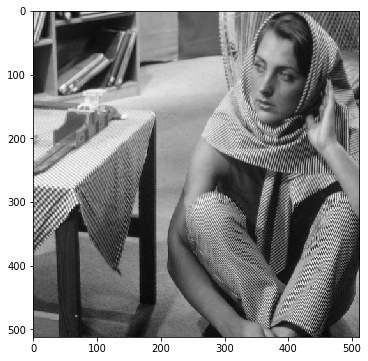

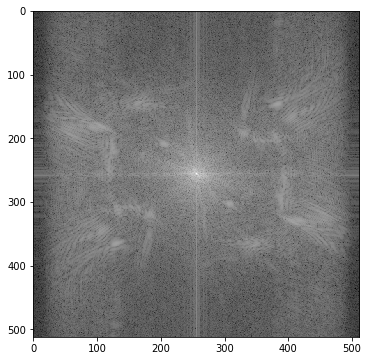

ITÉRATION N° 1 :
	Subsampled image:


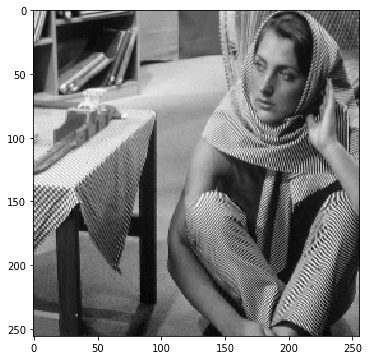

	Spectrum:


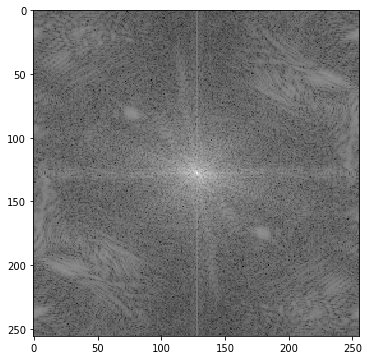

ITÉRATION N° 2 :
	Subsampled image:


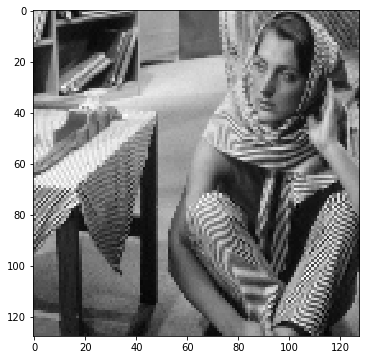

	Spectrum:


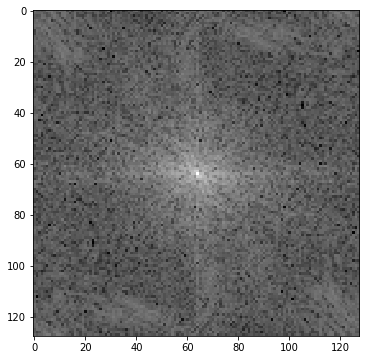

ITÉRATION N° 3 :
	Subsampled image:


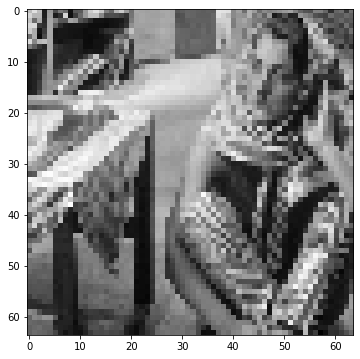

	Spectrum:


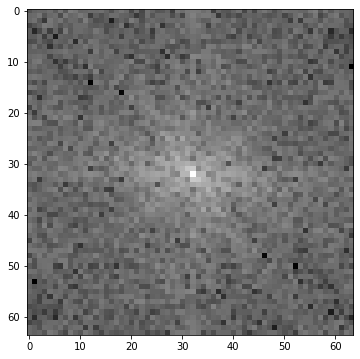

ITÉRATION N° 4 :
	Subsampled image:


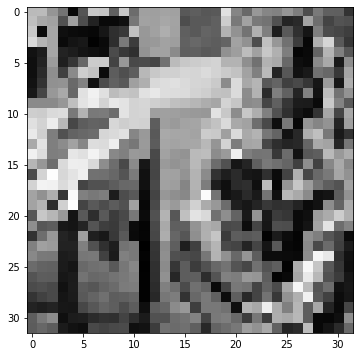

	Spectrum:


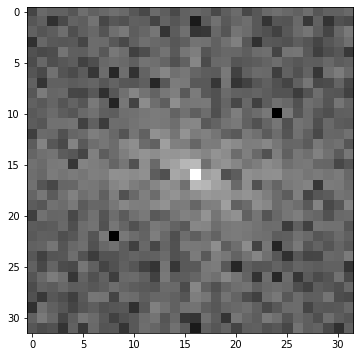

ITÉRATION N° 5 :
	Subsampled image:


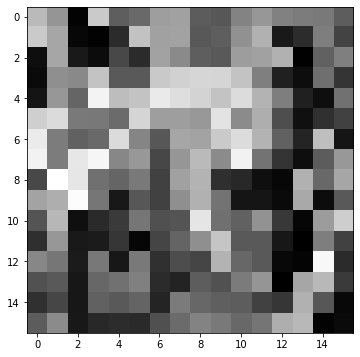

	Spectrum:


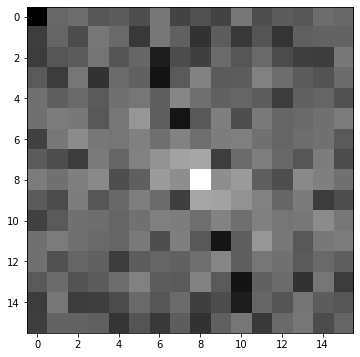

In [39]:
nb_it = 5
subsample_loop(barbara, nb_it)

We can already tell the effects of aliasing after the first iteration. Some areas, especially her clothes, look totally different. 
Basically, when the subsampling happens, we loose the information on the pixels that are "deleted". What used to be 4 pixels becomes one. We, therefore, have to make a decision on the color (or gray level) used to look most like the original picture. In the case of large areas of similar values, this would most definitly work. But, when the details (abrupt change of colors is small areas) get smaller, that "guessing" becomes way harder and very often result in image distortion. That's why we can see the most aliasing on her clothes and the tableclote (the grid patterns). 

3. Bonus question: same question with the image `img/mandrill.png`.

Original image:


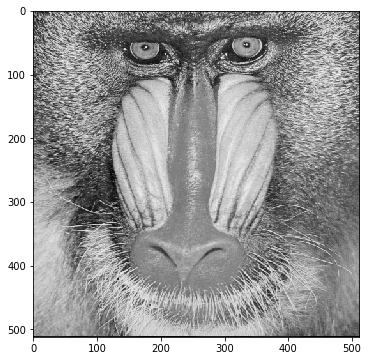

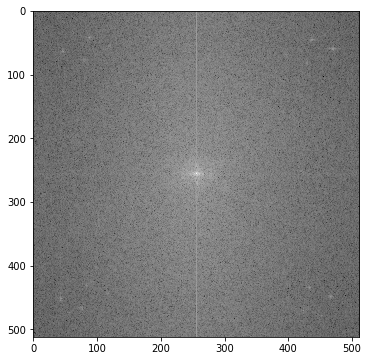

ITÉRATION N° 1 :
	Subsampled image:


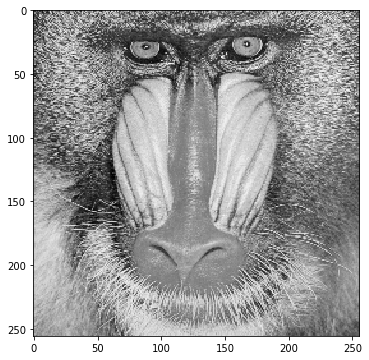

	Spectrum:


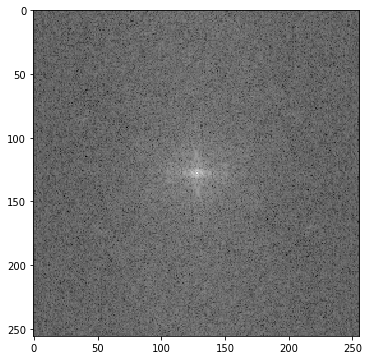

ITÉRATION N° 2 :
	Subsampled image:


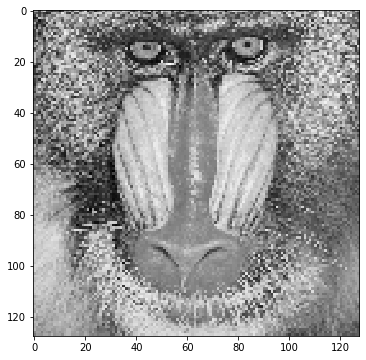

	Spectrum:


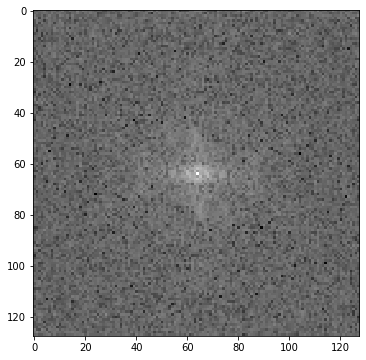

ITÉRATION N° 3 :
	Subsampled image:


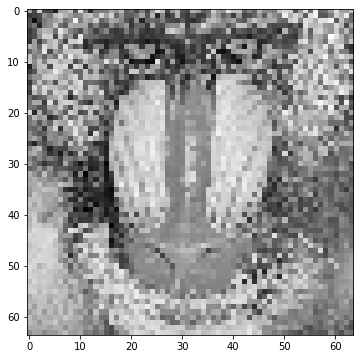

	Spectrum:


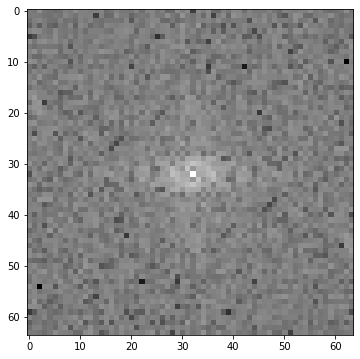

ITÉRATION N° 4 :
	Subsampled image:


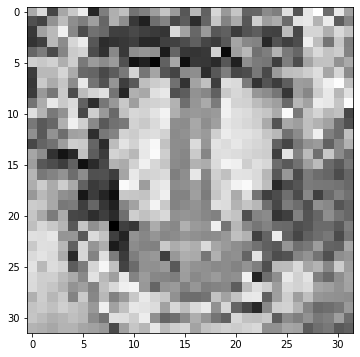

	Spectrum:


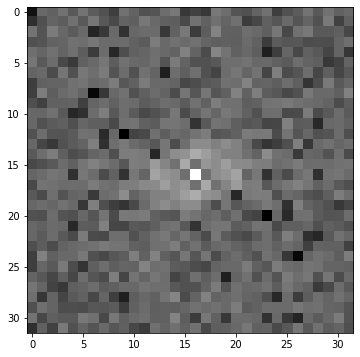

ITÉRATION N° 5 :
	Subsampled image:


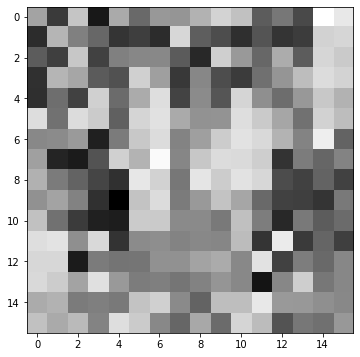

	Spectrum:


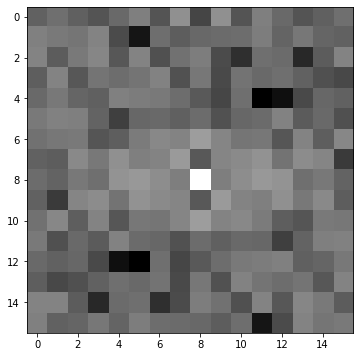

In [42]:
mandrill = np.array(Image.open('img/mandrill.png'))
### your code and comments start below
subsample_loop(mandrill, nb_it)


It's the same reasoning as before. There are a lot of smal details and abrupt changes (contours) in this image. That explains why so much aliasing happens.